((6, 4, 9), (16, 17, 4), (12, 12, 1), (21, 11, 9))
Ti-Li (11, 9) (4, 9)
	 collect: [(9, 7), (9.5, 8), (10, 8.5), (11, 9)]
	 collect: [(4, 9), (6, 8), (8, 7.5), (9, 7)]
	 collect: [(7, 6), (4, 9)]
	 collect: [(6, 5), (7, 6)]
	 collect: [(12, 1), (8, 3), (9, 5), (7, 4), (6, 5)]
	 collect: [(17, 4), (16, 2), (15, 1), (14, 2), (12, 1)]
	 collect: [(11, 9), (13, 7), (11, 5), (14, 4), (15, 6), (17, 4)]

 total rects count: 7


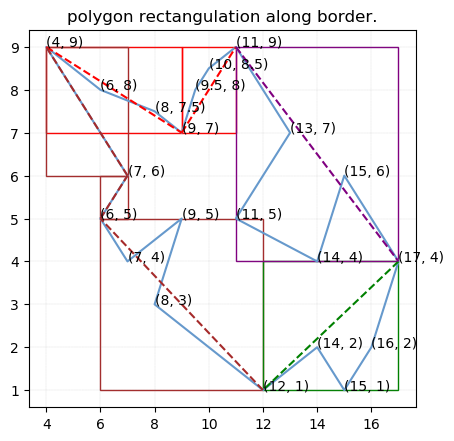

In [2]:
import numpy as np
import matplotlib 

def onbox(minx,maxx,miny,maxy,x,y):    
    if (x == minx or x == maxx) and miny < y < maxy:
        return 'on'
    if (y == miny or y == maxy) and minx < x < maxx:
        return 'on'

def inboxabs(lleftpoint,trightpoint,point):
    minx,maxx=min(lleftpoint[0],trightpoint[0]),max(lleftpoint[0],trightpoint[0])
    miny,maxy =min(lleftpoint[1],trightpoint[1]),max(lleftpoint[1],trightpoint[1])
    if minx < point[0] < maxx and miny < point[1] < maxy:
        return True
    return False

def inbox(lleftpoint,trightpoint,point):
    #print("start,endpoint,point"),lleftpoint,trightpoint,point
    #lleftpoint is lower left corner,
    #trightpoint=topright pint;
    #point is a tuple.
    #return true if 'point' is in the box
    minx = maxx = miny=maxy = 0
    if lleftpoint[0] < trightpoint[0]:
        minx = lleftpoint[0]
        maxx = trightpoint[0]
    else:
        minx = trightpoint[0]
        maxx = lleftpoint[0]
    #
    if lleftpoint[1] < trightpoint[1]:
        miny = lleftpoint[1]
        maxy = trightpoint[1]
    else:
        miny = trightpoint[1]
        maxy = lleftpoint[1]
        
    x,y = point[0],point[1]
    if minx <= x <= maxx and miny <= y <= maxy:
        return True
    return False
def switch(a,b):
    if a[0] > b[0]:
        return b,a
    if a[0] == b[0] and a[1] > b[1]:
        return b,a
    return a,b

def testibox():
    s = (11,9)
    e = (9,7)
    p = (10,8.5)
    print(inbox(e,s,p))

def testinboxabs():
    s,e,p =(4, 9),(12, 1),(6, 8)
    print(inboxabs(e,s,p))

def recdef(pt1,pt2):
    '''returns lower left point of a rectangle formed by diagonal points pt1,pt2.
    Also, returns width,height of such rectangle'''
    xmin = min(pt1[0],pt2[0]) 
    ymin = min(pt1[1],pt2[1])
    w,h = abs(pt1[0]-pt2[0]),abs(pt1[1]-pt2[1])
    return (xmin,ymin),w,h
def overlaps(pt1,pt2,checki,poly):
    '''pt1 and pt2 forms rectangle'''
    #check if any point in a poly_series in list_poly_series lies in box formed by pt1 and pt2.
    for testptidx in checki:
        if inboxabs(pt1,pt2,poly[testptidx]):
            return True
    return False
    
def rectangles(si,ei,poly):
    diff = si-ei
    #print("\t si,ei,diff"),si,ei,diff
    if diff > 0:
        ilist = poly[si:-1] + poly[0:ei+1] #points in series for collecting rectangles
        execi = [i for i in range(si,len(poly)-1-1)]+ [i for i in range(0,ei+1)]#exclude points in the series.
        checki = set([i for i in range(0,len(poly)-1)]) - set(execi) #check-against-these-points
    elif diff < 0:
            ilist = poly[si:ei+1]
            execi = [i for i in range(si,ei+1)]
            checki = set([i for i in range(0,len(poly)-1)]) - set(execi)
    #box
    collect,recs =[],[]
    sti = 0
    endi = len(ilist)-1
    while sti < len(ilist)-1:
        for k in range(len(ilist)-1-1,sti,-1):#track from back from end indx
            point = ilist[k]
            isoverlap = overlaps(ilist[sti], ilist[endi],checki,poly) #check if points in checki overlaps rect(sti,endi) formed.
            if inbox(ilist[sti],ilist[endi],point) and not isoverlap: #check if a test pt is in rect(sti,endi)
                collect +=[point]
            else:
                endi = k
                collect =[]
        collect +=[ilist[sti]] 
        collect = [ilist[endi]]+collect
        sti = endi
        endi = len(ilist)-1
        print("\t collect:"),collect
        recs +=[collect]
        collect =[]
    return recs

def main():
    
    from operator import itemgetter
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    poly1 = [(5, 6), (2, 5), (4, 3), (5, 2), (6, 3), (7, 1), (9, 2), (11, 3), (13, 5), (14, 6), (13, 7), (12, 8), (11, 9), (9, 12), (8, 13), (5, 12), (4, 10), (3, 9), (5, 6)]
    poly2 = [(11,9),(10,8.5), (9.5,8),(9,7),(8,7.5),
             (6,8),(4,9),(7,6), (6,5),(7,4),(9,5),(8,3),(12,1),(14,2),(15,1),(16,2),(17,4),(15,6),
             (14,4),(11,5),(13,7),(11,9)]
    fillrecs = 0
    colrname=['red','brown','green','purple']

    #work with poly.
    poly = poly2
    x = [t[0] for t in poly]
    y = [t[1] for t in poly]

    #graphing
    fig= plt.figure(1, figsize=(5,5), dpi=100)
    ax = fig.add_subplot(111)
    ax.plot([t[0] for t in poly], [t[1] for t in poly], color='#6699cc', alpha=1,
        linewidth=1.5, solid_capstyle='round', zorder=2)

    #compute indices for lowest,highest, rightmost, bottom points.
    polyIdx = [(idx,)+poly[idx] for idx in range(len(poly))]
    #find Left,Right pts
    sxpolyIdx = sorted(polyIdx,key=itemgetter(1)) #sort by x
    Li = sxpolyIdx[0][0]
    Ri = sxpolyIdx[-1][0]

    #find Top,Bottom pts
    sypolyIdx = sorted(polyIdx,key=itemgetter(2)) #sort by y
    Bi = sypolyIdx[0][0]
    Ti = sypolyIdx[-1][0]
    print(polyIdx[Li],polyIdx[Ri],polyIdx[Bi],polyIdx[Ti])

    print("Ti-Li"),poly[Ti],poly[Li]
    recs =[]; c=[]
    recs = rectangles(Ti,Li,poly) #rectangles
    c = [colrname[0] for i in range(len(recs))]

    r = rectangles(Li,Bi,poly)
    recs +=r
    c += [colrname[1] for i in range(len(r))]

    r =rectangles(Bi,Ri,poly)
    recs +=r
    c += [colrname[2] for i in range(len(r))]

    r =rectangles(Ri,Ti,poly)
    recs +=r
    c += [colrname[3] for i in range(len(r))]

    cnt =0
    for r in recs:
        pt,w,h = recdef(r[0],r[-1])
        ax.plot([r[0][0],r[-1][0]], [r[0][1],r[-1][1]],'--',c=c[cnt])
        if fillrecs:
            rect = patches.Rectangle(pt,w,h,linewidth=1,edgecolor=c[cnt],facecolor=c[cnt])
        else:
            rect = patches.Rectangle(pt,w,h,linewidth=1,edgecolor=c[cnt],facecolor="none")
        ax.add_patch(rect)
        cnt +=1
    print("\n total rects count:"),cnt
    for i in range(len(x)-1):
        plt.text(x[i], y[i], (x[i],y[i]))
    
    ax.set_title('polygon rectangulation along border.')
    ax.grid(color='grey', linestyle='--', linewidth=.1)
    plt.show()

main()
